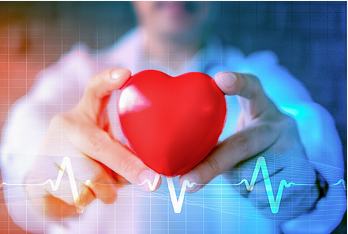

# Data Description

## Background
`Heart diseases`, also known as cardiovascular diseases (CVDs) are the number 1 cause of death around the world.  
In 2016 alone, 17.9 million people died from CVDs, accounting for 31% of deaths globally, with 85% of these having been due to a heart attack or stroke.    

## Business/Research need
The diagnosis of heart disease is done on a combination of clinical signs and test results. We want to see if we can find any trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.


## Features


* **age**  
* **sex**   (1 = male, 0 = female)
* **cp:**   Chest pain type (4 values)   (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)    
Angina (Chest Pain) is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back.  
* **trestbps:** Resting blood pressure.   
ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg. high blood pressure is considered to be 140/90mmHg or higher. low blood pressure is considered to be 90/60mmHg or lower.
* **chol:**  Serum cholestoral in mg/dl.   
Cholesterol is often associated with heart disease. That’s because low-density lipoproteins (LDL) can build up in your arteries and restrict or block blood flow. Your body still needs a little cholesterol for healthy digestion and to make vitamin D and certain hormones.    
* **fbs:**  Fasting blood sugar > 120 mg/dl.    
Fasting blood sugar test. A blood sample will be taken after an overnight fast. A fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal. A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes. If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes.  
* **restecg:**  Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* **thalach:**  Maximum heart rate achieved   
You can calculate your maximum heart rate by subtracting your age from 220. For example, if you're 45 years old, subtract 45 from 220 to get a maximum heart rate of 175. This is the average maximum number of times your heart should beat per minute during exercise.
* **exang:**  Exercise induced angina (1 = yes; 0 = no)
* **oldpeak:**  Oldpeak = ST depression induced by exercise relative to rest  
* **slope:**  The slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) 
* **ca:**  number of major vessels (0-3) colored by flourosopy  
Number of major vessels colored by fluoroscopy had a medium effect on the CAD diagnosis that could be due to the small sample size of the study population.
* **thal:**  A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

blood pressure:

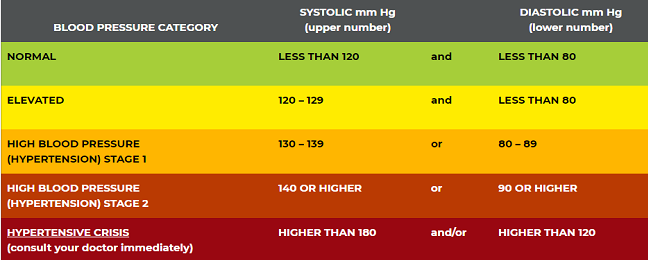 

cholestoral:

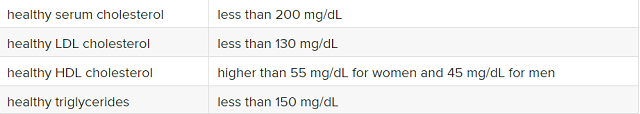

## Problems Definition
Here we want to know:
* Is there any group more susceptible to heart disease? (like age, gender)
* Which attributes are mainly related to heart disease?
* How do these factors affect heart disease? Is there a big correlation between some normal and abnormal indicators and heart disease?
* Is any other trends in heart data to predict certain cardiovascular events or could we find any clear indications of heart health?
* How can we predict heart disease according to machine learning models? And how about their accuracy?

## Approach
Firstly, I would use EDA to view the relationship between different attributes and find is there any obvious pattern to cause a heart disease. And then I would do data feature engineer according to the EDA. Lastly, I will split the data into train data and test data and build models to predict heart disease according to these features.  
The specific approaches and steps are as follows:  
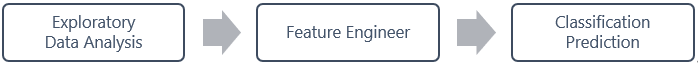
* Make data more readable through converting code into actual meaning (label decode).
* Use scatter plots, bar chart to understand the relationship between different attributes and heart disease. Use distribution plots to view the age/gender difference in heart disease.
* Transform some indicator data into qualitative data according to health standards defined, and view whether the classification of health standards will result in a more obvious correlation with heart disease.
* View and remove outliers if have.
* Feature engineering and feature selection (if necessary).
* Divide the data set into training set and test set and use cross-validation.
* Use classification models training: KNN, Naive Bayes, Logistic Regression, Decision Tree, SVM. Compare the ROC-curve and stacked the models.

# Set up environment and import data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objs as go # interactive plotting library
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,confusion_matrix,auc

In [ ]:
heart_data = pd.read_csv("../input/heart-disease-uci/heart.csv")
heart_data.head()

# Exploratory Data Analysis

## Add readable features

Transform some indicator data into qualitative data according to health standards defined.

In [ ]:
sexMap={1:"male",0:"female"}
heart_data['sex_label']=heart_data['sex'].map(sexMap)
cpMap={1:"typical angina",2:"atypical angina",3:"non-anginal pain",4:"asymptomatic"}
heart_data['cp_label']=heart_data['cp'].map(cpMap)
fbsMap={1:"true",0:"false"}
heart_data['fbs_label']=heart_data['fbs'].map(fbsMap)
restecgMap={0:"normal",1:"having ST-T wave abnormality",2:"showing probable or definite left ventricular hypertrophy by Estes' criteria"}
heart_data['restecg_label']=heart_data['restecg'].map(restecgMap)
exangMap={0:"no",1:"yes"}
heart_data['exang_label']=heart_data['exang'].map(exangMap)
slopeMap={1:"upsloping",2:"flat",3:"downsloping"}
heart_data['slope_label']=heart_data['slope'].map(slopeMap)
thalMap={1:"normal",2:"fixed defect",3:"reversable defect"}
heart_data['thal_label']=heart_data['thal'].map(thalMap)

targetMap={1:"heart disease",0:"health"}
heart_data['target_label']=heart_data['target'].map(targetMap)

heart_data['trestbps_label'] = heart_data.trestbps.apply(lambda x: "normal" if x<120  else("elevated" if x < 130 else ( "high stage1" if x < 140 else( "high stage2" if x < 180 else "hypertensive crisis" ))))

## Visualization Analysis

Information we got from the visualization analysis:  
* **People with heart disease have a greater maximum heart rate.** healthy people have maximum heart rate achieved from 125 to 155, while people with heart disease range from 150 to 170.
* **People with heart disease seems have a lower oldpeak than healthy people.** 
* **People with typical angina are more likely having a heart disease.** 
* **People having ST-T wave abnormality are more likely having a heart disease.** 
* **People whose value of the slope of the peak exercise ST segment equal to 2 are more likely having a heart disease.** 
* **People who have fixed defect thalassemia are more likely having a heart disease.** 

In [ ]:
fig = px.violin(heart_data, y="age", x="sex_label", color="target_label", box=True, points="all",
                labels={
                    "sex_label": "Gender",
                     "target_label": "Health Condition"
                 },title="Age Distribution by Gender And Health Condition",
          hover_data=heart_data.columns)
fig.show()

In [ ]:
fig = px.histogram(heart_data, x="trestbps", color="target_label",labels={
                     "trestbps": "Resting blood pressure",
                     "target_label": "Health Condition"
                 },title="Resting Blood Pressure Distribution by Health Condition",marginal="box")
fig.update_traces(opacity=0.85)
fig.show()

In [ ]:
fig = px.histogram(heart_data, x="chol", color="target_label",labels={
                     "chol": "Serum cholestoral in mg/dl",
                     "target_label": "Health Condition"
                 },title="Serum Cholestoral Distribution by Health Condition",marginal="box")
fig.update_traces(opacity=0.85)
fig.show()

In [ ]:
fig = px.histogram(heart_data, x="thalach", color="target_label",labels={
                     "thalach": "The person's maximum heart rate achieved",
                     "target_label": "Health Condition"
                 },title="Maximum Heart Rate Achieved Distribution by Health Condition",marginal="box")
fig.update_traces(opacity=0.85)
fig.show()

In [ ]:
fig = px.histogram(heart_data, x="oldpeak", color="target_label",labels={
                     "oldpeak": "ST depression induced by exercise relative to rest",
                     "target_label": "Health Condition"
                 },title="Oldpeak Distribution by Health Condition",marginal="box")
fig.update_traces(opacity=0.85)
fig.show()

In [ ]:
# Taking the count of each Sex value of the disease
heart_disease_cp= heart_data[heart_data.target.eq(1)]['cp_label'].value_counts()
heart_disease_cp = pd.DataFrame({'cp':heart_disease_cp.index, 'count':heart_disease_cp.values})

# Taking the count of each Sex value of the health
heart_health_cp = heart_data[heart_data.target.eq(0)]['cp_label'].value_counts()
heart_health_cp = pd.DataFrame({'cp':heart_health_cp.index, 'count':heart_health_cp.values})

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=heart_disease_cp['cp'], values=heart_disease_cp['count'], name="disease"),
              1, 1)
fig.add_trace(go.Pie(labels=heart_health_cp['cp'], values=heart_health_cp['count'], name="health"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.45, hoverinfo="label+percent+value+name")

fig.update_layout(
    title_text="The Chest Pain Distribution by Health Condition",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Heart Disease', x=0.14, y=0.5, font_size=16, showarrow=False),
                 dict(text='Health', x=0.82, y=0.5, font_size=16, showarrow=False)])
fig.show()

In [ ]:
# Taking the count of each Sex value of the disease
heart_disease_restecg= heart_data[heart_data.target.eq(1)]['restecg_label'].value_counts()
heart_disease_restecg = pd.DataFrame({'restecg':heart_disease_restecg.index, 'count':heart_disease_restecg.values})

# Taking the count of each Sex value of the health
heart_health_restecg = heart_data[heart_data.target.eq(0)]['restecg_label'].value_counts()
heart_health_restecg = pd.DataFrame({'restecg':heart_health_restecg.index, 'count':heart_health_restecg.values})

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=heart_disease_restecg['restecg'], values=heart_disease_restecg['count'], name="disease"), 
              1, 1)
fig.add_trace(go.Pie(labels=heart_health_restecg['restecg'], values=heart_health_restecg['count'], name="health"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.45, hoverinfo="label+percent+value+name")

fig.update_layout(
    title_text="Resting Electrocardiographic Distribution by Health Condition",
    legend=dict( yanchor="top", y=-0.1, xanchor="left", x=0.6),
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Heart Disease', x=0.15, y=0.5, font_size=16, showarrow=False),
                 dict(text='Health', x=0.82, y=0.5, font_size=16, showarrow=False)])
fig.show()

In [ ]:
# Taking the count of each Sex value of the disease
heart_disease_slope= heart_data[heart_data.target.eq(1)]['slope'].value_counts()
heart_disease_slope = pd.DataFrame({'slope':heart_disease_slope.index, 'count':heart_disease_slope.values})

# Taking the count of each Sex value of the health
heart_health_slope = heart_data[heart_data.target.eq(0)]['slope'].value_counts()
heart_health_slope = pd.DataFrame({'slope':heart_health_slope.index, 'count':heart_health_slope.values})

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=heart_disease_slope['slope'], values=heart_disease_slope['count'], name="disease"),
              1, 1)
fig.add_trace(go.Pie(labels=heart_health_slope['slope'], values=heart_health_slope['count'], name="health"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.45, hoverinfo="label+percent+value+name")

fig.update_layout(
    title_text="Slope Distribution by Health Condition",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Heart Disease', x=0.15, y=0.5, font_size=16, showarrow=False),
                 dict(text='Health', x=0.82, y=0.5, font_size=16, showarrow=False)])
fig.show()

In [ ]:
# Taking the count of each Sex value of the disease
heart_disease_thal= heart_data[heart_data.target.eq(1)]['thal_label'].value_counts()
heart_disease_thal = pd.DataFrame({'thal':heart_disease_thal.index, 'count':heart_disease_thal.values})

# Taking the count of each Sex value of the health
heart_health_thal = heart_data[heart_data.target.eq(0)]['thal_label'].value_counts()
heart_health_thal = pd.DataFrame({'thal':heart_health_thal.index, 'count':heart_health_thal.values})

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=heart_disease_thal['thal'], values=heart_disease_thal['count'], name="disease"),
              1, 1)
fig.add_trace(go.Pie(labels=heart_health_thal['thal'], values=heart_health_thal['count'], name="health"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.45, hoverinfo="label+percent+value+name")

fig.update_layout(
    title_text="Thalassemia Distribution by Health Condition",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Heart Disease', x=0.15, y=0.5, font_size=16, showarrow=False),
                 dict(text='Health', x=0.82, y=0.5, font_size=16, showarrow=False)])
fig.show()

## Correlation

Here we can see that **"cp", "thalach", "exang", "oldpeak", "ca"** have obvious correlation with heart disease

In [ ]:
heart_data.corr()['target'].sort_values(ascending =False)[0:15]

In [ ]:
fig = px.imshow(heart_data.corr(),color_continuous_scale='rdbu_r',zmin=-1,zmax=1)
fig.show()

# Build Model

## Split data set into train and test

In [ ]:
data_X=heart_data.iloc[:, 0:13]
data_y=heart_data[['target']]
X_train,X_test,y_train,y_test = train_test_split(data_X, data_y, test_size = 0.25, random_state = 250)

## Data Scaler

In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## Logistic Regression

In [ ]:
lg = LogisticRegression()  
lg.fit(X_train, y_train.values.ravel())
#y_predict = lg.predict(X_test)
y_scores_lg = lg.predict_proba(X_test)
fpr_lg, tpr_lg, threshold_lg = roc_curve(y_test, y_scores_lg[:, 1])
roc_auc_lg = auc(fpr_lg, tpr_lg)

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train.values.ravel())
y_scores_knn = knn.predict_proba(X_test)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, y_scores_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

## Gaussian Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train.values.ravel())
y_scores_NB = NB.predict_proba(X_test)
fpr_NB, tpr_NB, threshold_NB = roc_curve(y_test, y_scores_NB[:, 1])
roc_auc_NB = auc(fpr_NB, tpr_NB)

## Compare ROC Curves Chart

In [ ]:
fig = go.Figure()
# Create and style traces
line_lg=go.Scatter(x=fpr_lg, y=tpr_lg, name='LG AUC = %0.2f' % roc_auc_lg,
                         line=dict(color='firebrick', width=4))
line_knn=go.Scatter(x=fpr_knn, y=tpr_knn, name='KNN AUC = %0.2f' % roc_auc_knn,
                         line=dict(color='royalblue', width=4))
line_NB=go.Scatter(x=fpr_NB, y=tpr_NB, name='GaussianNB AUC = %0.2f' % roc_auc_NB,
                         line=dict(color='green', width=4))

fig.add_trace(line_lg)
fig.add_trace(line_knn)
fig.add_trace(line_NB)
fig.add_trace(go.Scatter(x=[0,1],y=[0,1],name='',line=dict(color='black',dash='dash')))
fig.update_layout(title='ROC Curve',
                   xaxis_title='False Positive Rate',
                   yaxis_title='True Positive Rate')


fig.show()

# Summary

After EDA and modeling, we can figure out that:
* The average age of heart disease in male is younger than female.
* The chest pain, exercise induced angina have obvious correlation with heart disease which indicate that these signs worthing attracting people's attention.
* We use Logistic Regression, KNN, Gaussian Naive Bayes to predict the heart disease in this case. And compared these models performance, they all have good accuracy at around 0.88.  Based on the patient’s clinical medical database, perhaps in the future these classification models can help us identify heart disease and alert patients in time. 

## References  
* Cardiovascular Diseases Overview,World Health Organization,viewed 2th September 2020  
https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1
* 'Angina (Chest Pain)', heart.org, 19th September 2020  
https://www.heart.org/en/health-topics/heart-attack/angina-chest-pain#:~:text=Angina%20is%20chest%20pain%20or,neck%2C%20jaw%2C%20or%20back.
* 'resting blood pressure', Wikipedia, 19th September 2020  
https://en.wikipedia.org/wiki/Blood_pressure#:~:text=Normal%20resting%20blood%20pressure%2C%20in,to%20the%20present%2C%20at%20approx.
* 'Diabetes', mayoclinic.org, 19th September 2020  
https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451#:~:text=Fasting%20blood%20sugar%20test.&text=A%20fasting%20blood%20sugar%20level,separate%20tests%2C%20you%20have%20diabetes.
* 'major vessels colored by flourosopy',US National Library of Medicine National Institutes of Health, 24th September 2020  
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4468223/